In [1]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 

library(plot3D)

library(mclust)

Warning message:
“no DISPLAY variable so Tk is not available”
Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [195]:
source('lcic.r')

In [3]:
original_data <- read.csv('Data/wdbc.data', header=FALSE)
original_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


In [4]:
n_examples = nrow(original_data)

In [5]:
# Pre-process and extract variables as per Samworth
# "the standard errors of the first two measurements"
# X = stderr(radius) {V13 above}, Y = stderr(texture) {V14 above}

predictors_mat <- matrix(0, nrow=n_examples, ncol=2)
predictors_mat[,1] <- original_data[,13]
predictors_mat[,2] <- original_data[,14]

targets_mat <- (original_data[,2]=='M')*1



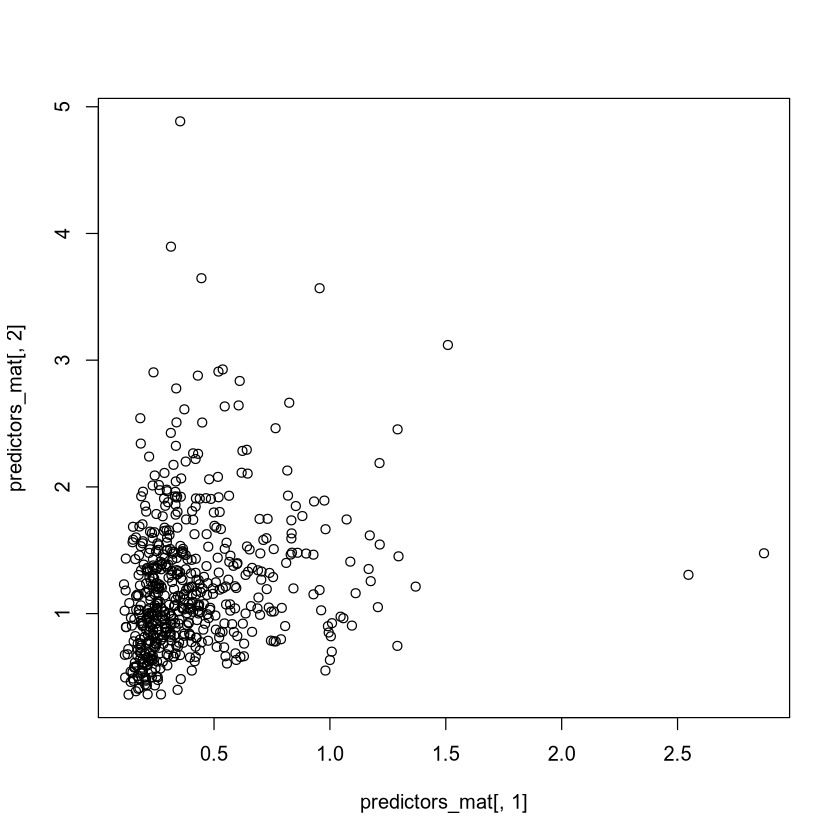

In [337]:
plot(x=predictors_mat[,1], y=predictors_mat[,2])

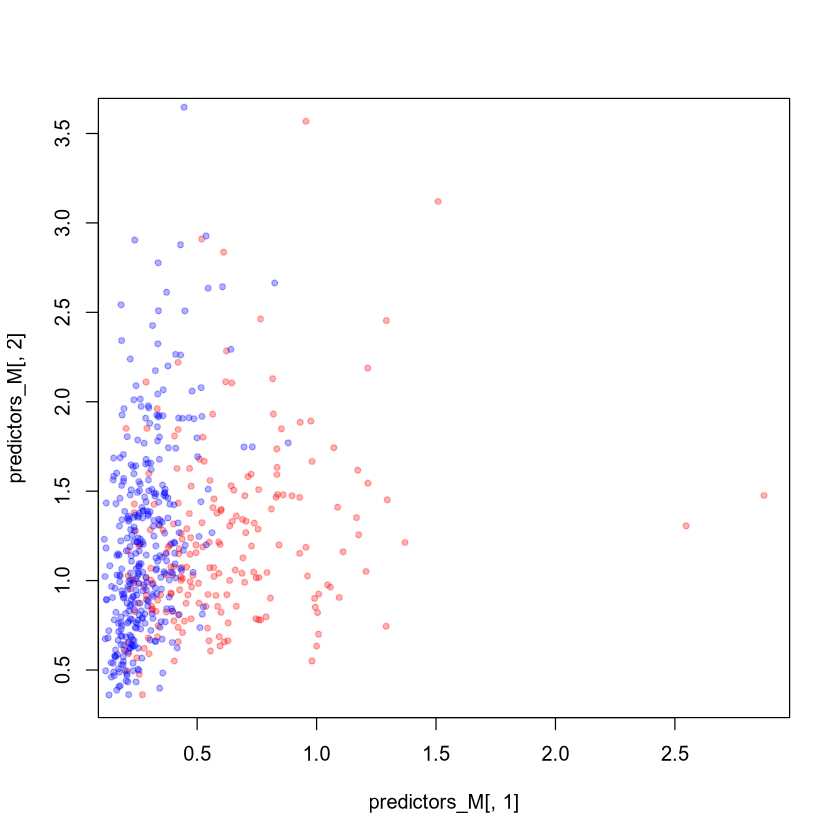

In [336]:
predictors_M = predictors_mat[targets_mat==1,]
predictors_B = predictors_mat[targets_mat==0,]

plot(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.3))
points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.3))


In [7]:
RealData <- package_real_data(predictors_mat)
RealData

1.0950,0.9053
0.5435,0.7339
0.7456,0.7869
0.4956,1.1560
0.7572,0.7813
0.3345,0.8902
0.4467,0.7732
0.5835,1.3770
0.3063,1.0020
0.2976,1.5990
0.3795,1.1870


In [8]:
num_clusters <- 2
theta_mat_init_hc <- initialize_EM(RealData, num_clusters)
size(theta_mat_init_hc)


[1] 569   2

In [40]:
num_clusters <- 2
theta_mat_init <- matrix(0, nrow=RealData$n, ncol=num_clusters)
theta_mat_init[,1] <- sample(c(0.3,0.7), size=RealData$n, replace=TRUE)
theta_mat_init[,2] <- 1 - theta_mat_init[,1]
size(theta_mat_init)

[1] 569   2

In [41]:
# em_output <- EM_with_lcic(RealData, theta_mat_init_hc, num_clusters, resample_factors=c(4,4), num_iter=50)
em_output <- EM_with_lcic(RealData, theta_mat_init, num_clusters, resample_factors=c(4,4), num_iter=50)

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4340365
[1] "Iter: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4330571
[1] "Iter: "
[1] 3
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4147309
[1] "Iter: "
[1] 4
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4301118
[1] "Iter: "
[1] 5
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4289724
[1] "Iter: "
[1] 6
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!

In [47]:
# em_fulldim <- EM_with_fulldim(RealData, num_clusters, max_iter=20, verbose=2) # This gets 192 incorrect
em_fulldim <- EM_with_fulldim(RealData, num_clusters, max_iter=50, verbose=2)

Number of iterations: 1  Oldloglik: -380.934528043163 Newloglik -145.96928714218 
Number of iterations: 2  Oldloglik: -145.96928714218 Newloglik -144.272180974337 
Number of iterations: 3  Oldloglik: -144.272180974337 Newloglik -143.043863233569 
Number of iterations: 4  Oldloglik: -143.043863233569 Newloglik -141.951548503183 
Number of iterations: 5  Oldloglik: -141.951548503183 Newloglik -140.634419023168 
Number of iterations: 6  Oldloglik: -140.634419023168 Newloglik -139.590711659541 
Number of iterations: 7  Oldloglik: -139.590711659541 Newloglik -138.736650424873 
Number of iterations: 8  Oldloglik: -138.736650424873 Newloglik -138.162116123499 
Number of iterations: 9  Oldloglik: -138.162116123499 Newloglik -137.628467752642 
Number of iterations: 10  Oldloglik: -137.628467752642 Newloglik -137.110894523519 
Number of iterations: 11  Oldloglik: -137.110894523519 Newloglik -136.577605488939 
Number of iterations: 12  Oldloglik: -136.577605488939 Newloglik -136.103124124691 
Num

Warning message in EMmixlcd(SimData$pre_data, k = num_clusters, max.iter = max_iter, :
“maximum number of iterations reached”


In [48]:
em_fulldim$theta_mat

1.00000000,0.0000000
1.00000000,0.0000000
1.00000000,0.0000000
1.00000000,0.0000000
1.00000000,0.0000000
0.18353560,0.8164644
0.50885584,0.4911442
1.00000000,0.0000000
0.18702092,0.8129791
1.00000000,0.0000000
0.42325282,0.5767472


In [34]:
xg <- seq(0, 3.5, by=.05)
yg <- xg

gridmat <- data.matrix(expand.grid(xg, yg))
# gridmat

In [42]:
# z_vals_gt <- axis_aligned_heteroskedastic_gamma_pdf_vectorized(gridmat, SimData)
# z_vals_gt <- matrix(z_vals_gt, nrow=length(xg))

z_vals_estimated <- evaluate_mixture_density_vectorized(em_output$cluster_densities, em_output$pi_vec, gridmat)

z_vals_estimated <- matrix(z_vals_estimated, nrow=length(xg))

z_vals_d1 <- evaluate_logcondens_estimator_vectorized(gridmat, em_output$cluster_densities[[1]])
z_vals_d1 <- matrix(z_vals_d1, nrow=length(xg))

z_vals_d2 <- evaluate_logcondens_estimator_vectorized(gridmat, em_output$cluster_densities[[2]])
z_vals_d2 <- matrix(z_vals_d2, nrow=length(xg))



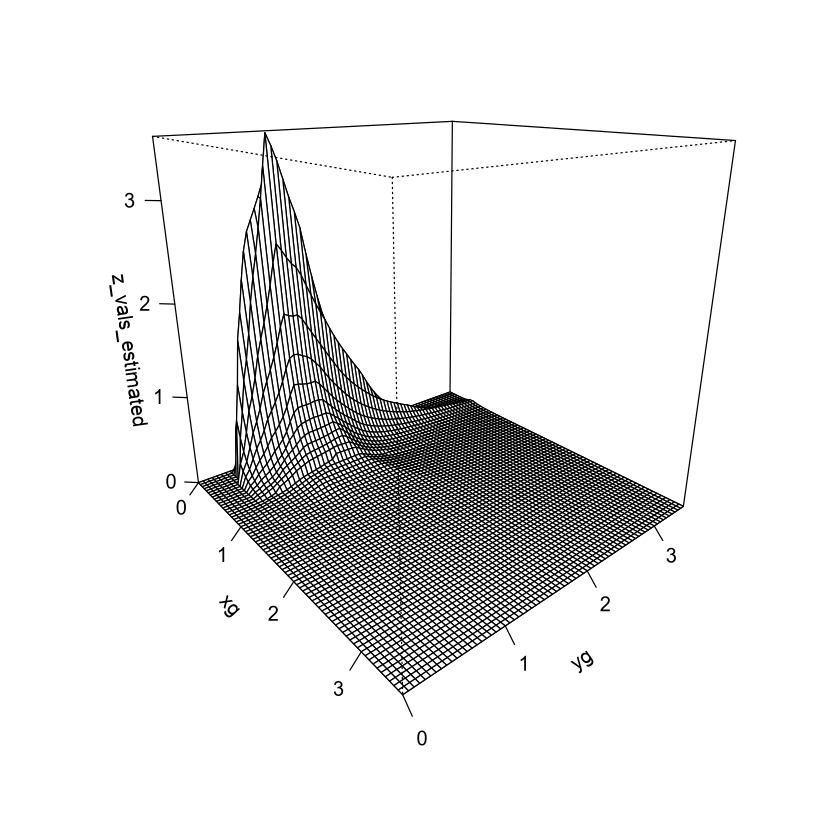

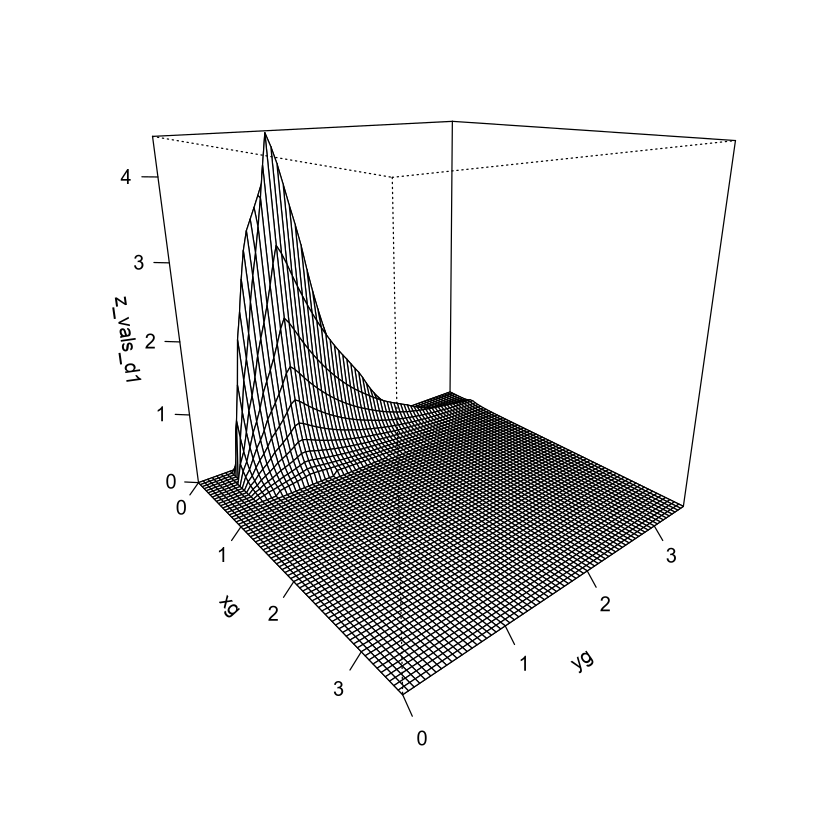

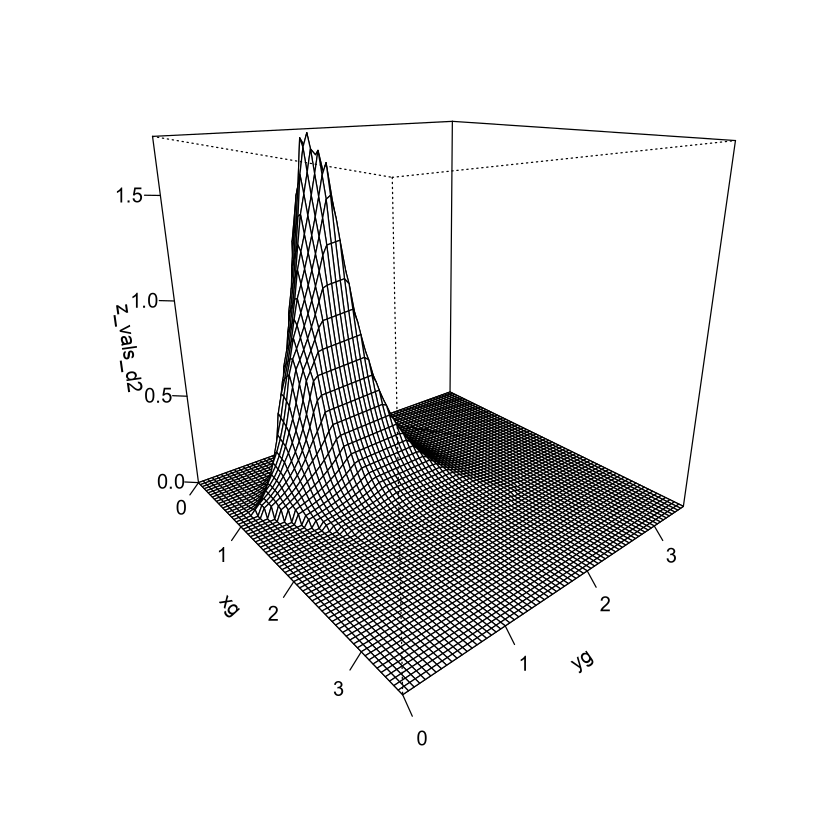

In [43]:
persp(xg, yg, z_vals_estimated, theta=50, phi=20, ticktype="detailed")
persp(xg, yg, z_vals_d1, theta=50, phi=20, ticktype="detailed")
persp(xg, yg, z_vals_d2, theta=50, phi=20, ticktype="detailed")


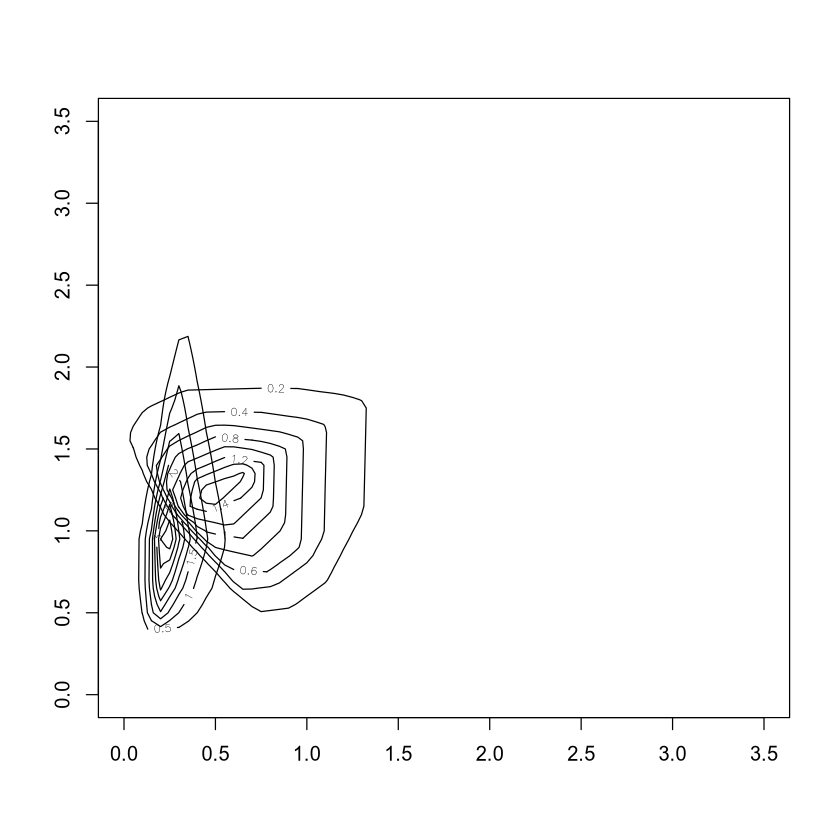

In [44]:
contour(xg, yg, z_vals_d1)
contour(xg, yg, z_vals_d2, add=TRUE)


In [1]:
NA

[1] NA

In [49]:
# misclassified instances

prediction_lcic_g <- (em_output$theta_mat[,1] > 0.5)*1
prediction_lcic_l <- (em_output$theta_mat[,1] < 0.5)*1

prediction_hc_g <- (theta_mat_init_hc[,1] > 0.5)*1
prediction_hc_l <- (theta_mat_init_hc[,1] < 0.5)*1

prediction_fulldim_g <- (em_fulldim$theta_mat[,1] > 0.5)*1
prediction_fulldim_l <- (em_fulldim$theta_mat[,1] < 0.5)*1



In [50]:
print('EM_lcic')

print(sum(abs(targets_mat - prediction_lcic_g)))

print(sum(abs(targets_mat - prediction_lcic_l)))

print('######')
print('HC')

print(sum(abs(targets_mat - prediction_hc_g)))

print(sum(abs(targets_mat - prediction_hc_l)))

print('######')
print('EM_fulldim')

print(sum(abs(targets_mat - prediction_fulldim_g)))

print(sum(abs(targets_mat - prediction_fulldim_l)))


[1] "EM_lcic"
[1] 434
[1] 135
[1] "######"
[1] "HC"
[1] 223
[1] 346
[1] "######"
[1] "EM_fulldim"
[1] 189
[1] 380


In [73]:
em_output$cluster_densities[[2]]$mean_vec

[1] 0.2620174 0.7346562

In [41]:
em_output$theta_mat

1.0000000,0.00000000
1.0000000,0.00000000
1.0000000,0.00000000
0.8503847,0.14961533
1.0000000,0.00000000
0.4610234,0.53897660
0.7134841,0.28651592
1.0000000,0.00000000
0.4031843,0.59681571
1.0000000,0.00000000
0.6778770,0.32212297


In [59]:
targets_mat

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 [75] 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
[112] 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
[149] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
[186] 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
[223] 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
[334] 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
[371] 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
[408] 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
[445] 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
[482] 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
[519] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 1 1 1 1 1 1 0

# Try clustering with all 30 features

In [58]:
# features_mat <- matrix(0, nrow=n_examples, ncol=30)
features_mat <- data.matrix(original_data[ , 3:32])
features_mat

V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,⋯,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [59]:
pca_res <- princomp(x=features_mat, scores=TRUE)
pca_res$scores

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,⋯,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28,Comp.29,Comp.30
1160.142574,-293.917544,-48.578398,8.711975,32.0004861,-1.26541481,0.93133697,-0.14816703,-0.74546310,0.58935949,⋯,2.118879e-02,-0.0002407554,-2.528321e-03,0.0115600264,0.0057728732,-1.376962e-03,1.981750e-03,-1.293349e-03,-0.0019891042,7.043784e-04
1269.122443,15.630182,35.394534,-17.861283,-4.3348740,0.22587178,-0.04603722,-0.20080392,0.48582795,-0.08403472,⋯,5.236699e-03,-0.0210690561,-1.564620e-03,0.0069675428,-0.0069781473,-1.411026e-03,8.336462e-05,1.346852e-03,-0.0006859252,-1.061251e-03
995.793889,39.156743,1.709753,-4.199340,-0.4665291,2.65281116,-0.77974468,0.27402558,0.17387427,-0.18699351,⋯,-9.865454e-03,0.0023938952,4.124713e-03,-0.0040072320,0.0007093204,3.780870e-03,-1.776466e-04,-1.848678e-05,0.0007752186,4.053603e-04
-407.180803,-67.380320,-8.672848,11.759867,7.1154611,-1.29943616,-1.26730424,0.06055510,0.33063864,-0.14415507,⋯,1.116866e-02,-0.0070633145,-1.537180e-03,0.0070031456,-0.0102611458,2.899215e-03,-1.551719e-05,-1.368877e-03,0.0021387441,-1.656561e-03
930.341180,189.340742,-1.374801,-8.499183,7.6132892,-1.02116044,-0.33552218,-0.28910859,-0.03608743,-0.13850191,⋯,-9.915872e-03,-0.0102686887,-2.204486e-03,0.0027641201,0.0024546664,-1.664589e-03,-3.290266e-03,-2.727563e-04,-0.0017832358,3.268664e-04
-211.591259,-79.877446,1.479457,2.899295,7.6205150,-0.74486827,1.16855639,0.37078253,-0.15244611,0.01998435,⋯,-1.927725e-03,-0.0036357777,1.079014e-03,-0.0093011152,0.0008406261,1.116189e-04,-9.798000e-04,-1.088184e-03,-0.0002244684,-1.138961e-04
821.210900,-47.149670,32.254999,-0.303847,3.1533127,-1.50580915,-0.42541721,0.33775020,0.17674882,0.26522016,⋯,5.003340e-03,-0.0056686691,1.454897e-03,0.0036907460,-0.0026714244,-1.170946e-03,1.789614e-03,1.452529e-03,-0.0002236230,-2.951981e-04
-25.089978,-74.186015,-11.790714,7.108247,2.9770960,1.57790777,0.14564909,-0.21440619,0.40708437,-0.13349521,⋯,8.156029e-03,-0.0114601382,-7.677063e-03,0.0028901493,-0.0009122329,3.607763e-03,6.764124e-05,8.498701e-04,-0.0012607605,-1.146040e-03
-191.292834,-42.126490,6.291312,10.537352,1.7111695,0.32250966,0.44388105,0.32262386,-0.50659824,-0.28384035,⋯,-5.300001e-03,0.0085150469,-4.690944e-03,-0.0067770658,-0.0012414513,6.427688e-03,1.842298e-03,-1.401151e-03,-0.0009672987,6.719461e-04
-238.292863,-65.386507,3.632150,12.609148,-8.8495681,2.08268223,4.85948894,-0.17335851,-0.55973817,-0.98325907,⋯,2.756669e-03,-0.0274688337,1.907123e-05,-0.0144247622,0.0065278680,-5.098383e-03,-6.507627e-03,4.942292e-03,-0.0018220741,-9.051672e-04


Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
6.655845e+02 8.542396e+01 2.650654e+01 7.385980e+00 6.310302e+00 1.731851e+00 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
1.346157e+00 6.089449e-01 3.940054e-01 2.896782e-01 1.776328e-01 8.651121e-02 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
5.617918e-02 4.645111e-02 3.638966e-02 2.528130e-02 1.934488e-02 1.532176e-02 
     Comp.19      Comp.20      Comp.21      Comp.22      Comp.23      Comp.24 
1.357421e-02 1.280201e-02 8.830228e-03 7.583529e-03 5.903890e-03 5.324037e-03 
     Comp.25      Comp.26      Comp.27      Comp.28      Comp.29      Comp.30 
4.014722e-03 3.531047e-03 1.916772e-03 1.686090e-03 1.414706e-03 8.371162e-04

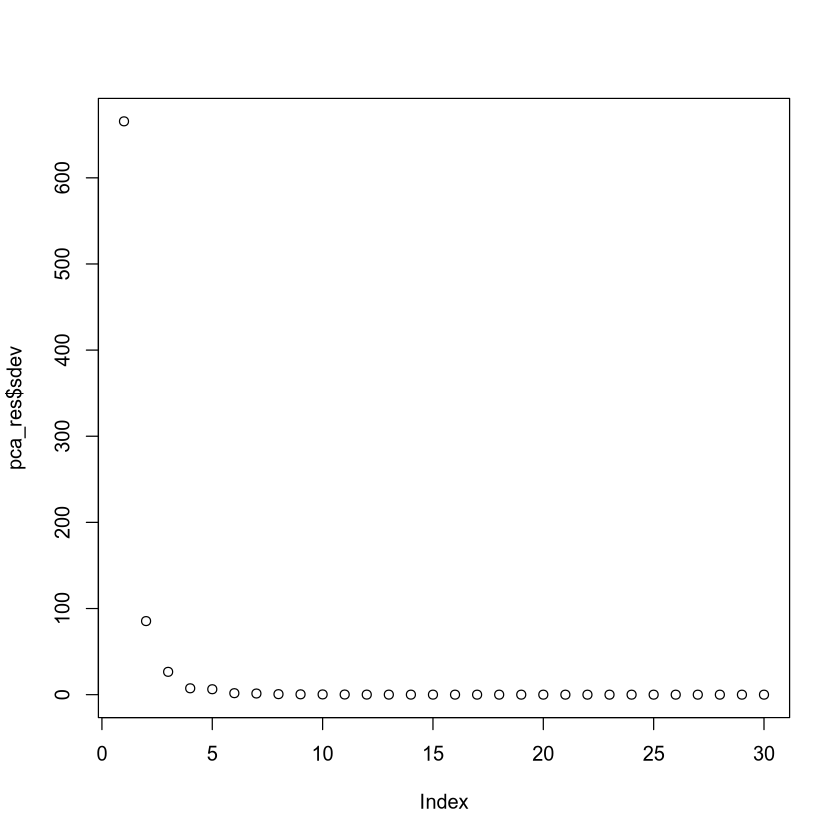

In [68]:
plot(pca_res$sdev)
pca_res$sdev

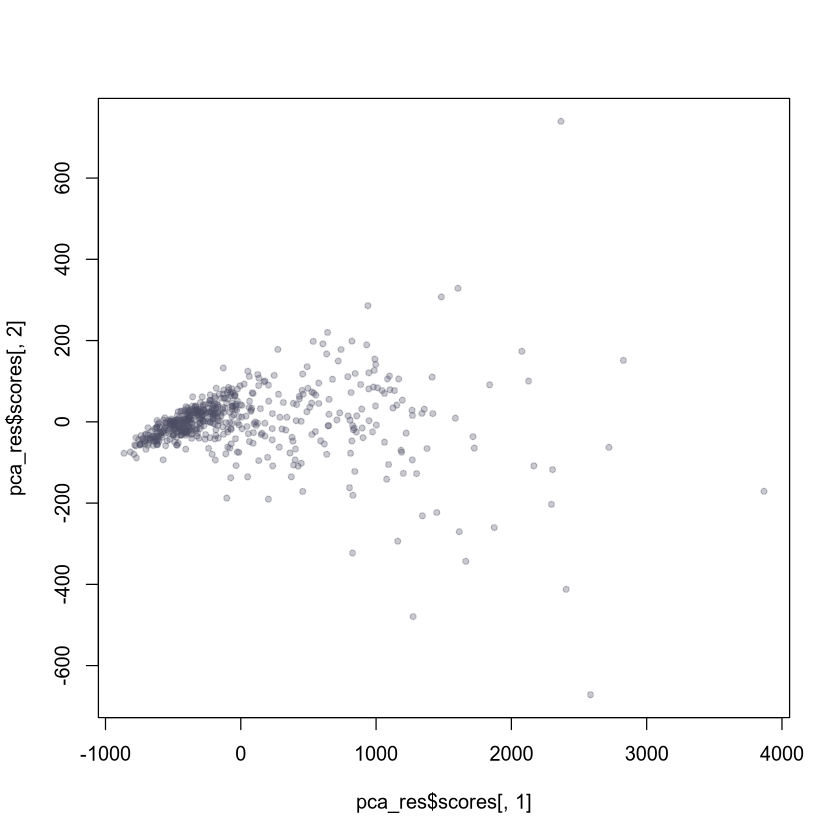

In [193]:
# range(pca_res$scores[,1], pca_res$scores[,2])
plot(x=pca_res$scores[,1], y=pca_res$scores[,2], pch=20, col=rgb(0.3,0.3,0.4,0.3))

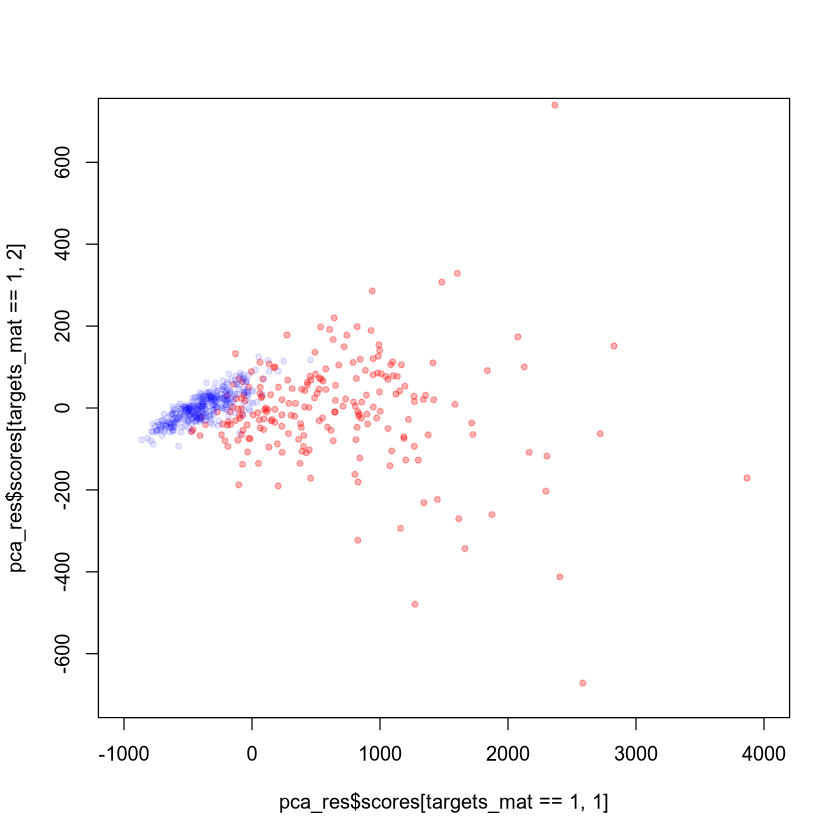

In [106]:
plot(x=pca_res$scores[targets_mat==1,1], y=pca_res$scores[targets_mat==1,2], pch=20, col=rgb(1,0,0,0.3), xlim=c(-1000,4000), ylim=c(-700,700))
points(x=pca_res$scores[targets_mat==0,1], y=pca_res$scores[targets_mat==0,2], pch=20, col=rgb(0,0,1,0.1))


In [69]:
RealDataHD <- package_real_data(features_mat)
RealDataHD

V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,⋯,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [196]:
num_clusters <- 2
theta_mat_init <- matrix(0, nrow=RealDataHD$n, ncol=num_clusters)
theta_mat_init[,1] <- sample(c(0.3,0.7), size=RealDataHD$n, replace=TRUE)
theta_mat_init[,2] <- 1 - theta_mat_init[,1]
size(theta_mat_init)

[1] 569   2

In [306]:
theta_mat_init_hc <- initialize_EM(RealDataHD, num_clusters)

In [307]:
# em_output_HD <- EM_with_lcic(RealDataHD, theta_mat_init, num_clusters, resample_factors=c(4,4), num_iter=8, theps=1e-6)
em_output_HD <- EM_with_lcic(RealDataHD, theta_mat_init_hc, num_clusters, resample_factors=c(4,4), num_iter=15, theps=1e-7)

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Marginal: "
[1] 3
[1] "Marginal: "
[1] 4
[1] "Marginal: "
[1] 5
[1] "Marginal: "
[1] 6
[1] "Marginal: "
[1] 7
[1] "Marginal: "
[1] 8
[1] "Marginal: "
[1] 9
[1] "Marginal: "
[1] 10
[1] "Marginal: "
[1] 11
[1] "Marginal: "
[1] 12
[1] "Marginal: "
[1] 13
[1] "Marginal: "
[1] 14
[1] "Marginal: "
[1] 15
[1] "Marginal: "
[1] 16
[1] "Marginal: "
[1] 17
[1] "Marginal: "
[1] 18
[1] "Marginal: "
[1] 19
[1] "Marginal: "
[1] 20
[1] "Marginal: "
[1] 21
[1] "Marginal: "
[1] 22
[1] "Marginal: "
[1] 23
[1] "Marginal: "
[1] 24
[1] "Marginal: "
[1] 25
[1] "Marginal: "
[1] 26
[1] "Marginal: "
[1] 27
[1] "Marginal: "
[1] 28
[1] "Marginal: "
[1] 29
[1] "Marginal: "
[1] 30
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Marginal: "
[1] 3
[1] "Marginal: "
[1] 4
[1] "Marginal: "
[1] 5
[1] "Marginal: "
[1] 6
[1] "Marginal: "
[1] 7
[1] "Marginal: "
[1] 8
[1

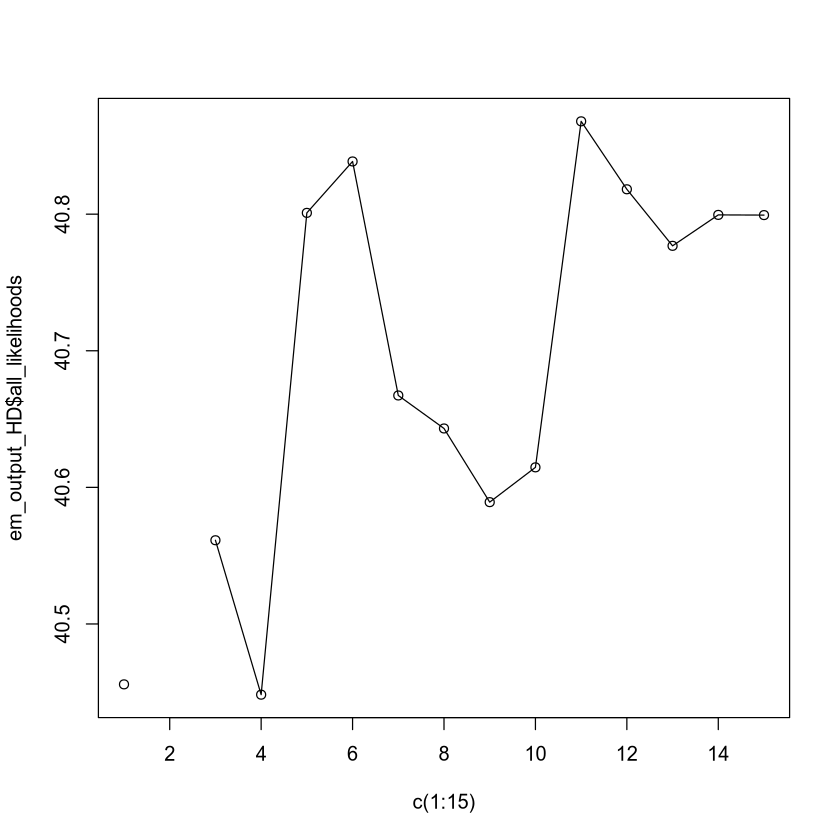

In [315]:
plot(c(1:15), em_output_HD$all_likelihoods)
lines(c(1:15), em_output_HD$all_likelihoods, lty=1)

In [316]:
em_output_HD$pi_vec

[1] 0.3009138 0.6990862

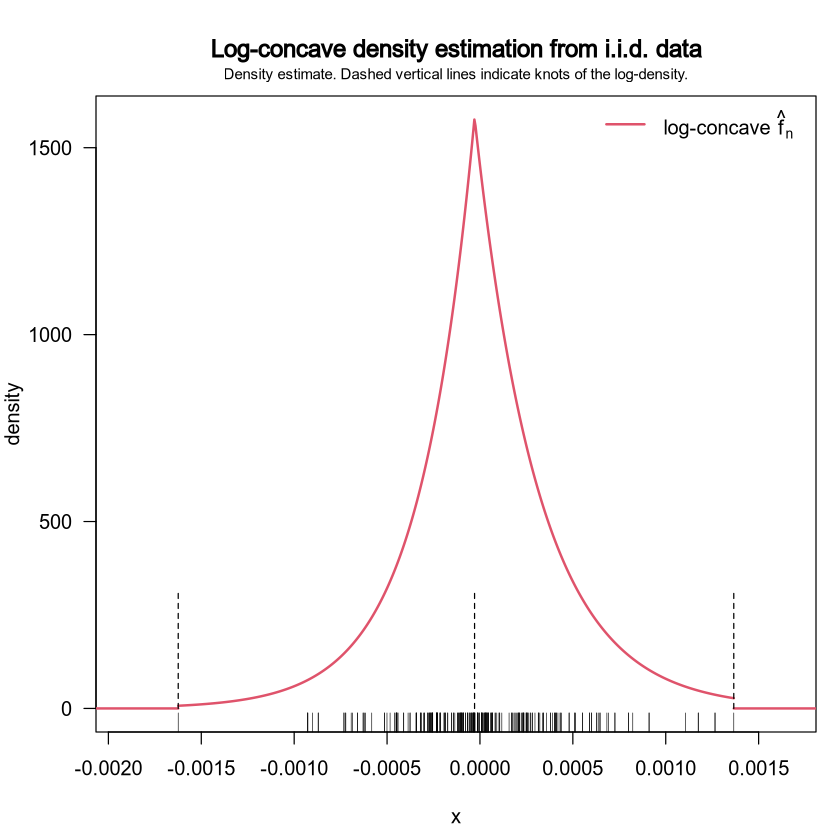

In [317]:
plot(em_output_HD$cluster_densities[[1]]$marginals[[30]])

In [318]:
prediction_lcic_g_HD <- (em_output_HD$theta_mat[,1] > 0.5)
prediction_lcic_l_HD <- (em_output_HD$theta_mat[,1] < 0.5)

prediction_hc_g <- (theta_mat_init_hc[,1] > 0.5)*1
prediction_hc_l <- (theta_mat_init_hc[,1] < 0.5)*1

print("LCIC")
print(sum(abs(targets_mat - prediction_lcic_g_HD*1)))

print(sum(abs(targets_mat - prediction_lcic_l_HD*1)))

print("HC")
print(sum(abs(targets_mat - prediction_hc_g)))

print(sum(abs(targets_mat - prediction_hc_l)))


[1] "LCIC"
[1] 59
[1] 510
[1] "HC"
[1] 78
[1] 491


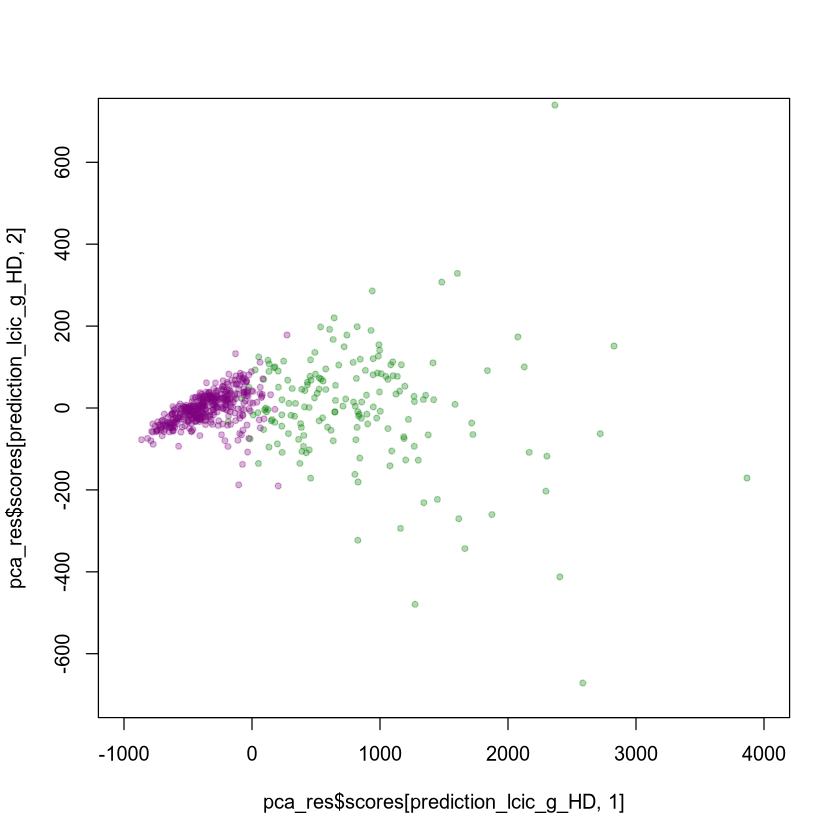

In [319]:
plot(x=pca_res$scores[prediction_lcic_g_HD,1], y=pca_res$scores[prediction_lcic_g_HD,2], pch=20, col=rgb(0,0.5,0,0.3), xlim=c(-1000,4000), ylim=c(-700,700))
points(x=pca_res$scores[prediction_lcic_l_HD,1], y=pca_res$scores[prediction_lcic_l_HD,2], pch=20, col=rgb(0.5,0,0.5,0.3))


In [114]:
# print(em_output_HD$theta_mat[1:6, 1])
# pmax(em_output_HD$theta_mat[1:6, 1], 0.01)
em_output_HD$theta_mat[1:6, ]
pmax(em_output_HD$theta_mat[1:6, ], 0.01)

0.000000e+00,1.0000000
1.000000e+00,0.0000000
2.114162e-08,1.0000000
0.000000e+00,1.0000000
3.439801e-06,0.9999966
7.635899e-01,0.2364101


0.0100000,1.0000000
1.0000000,0.0100000
0.0100000,1.0000000
0.0100000,1.0000000
0.0100000,0.9999966
0.7635899,0.2364101


In [113]:
# plot(em_output_HD$theta_mat[, 1], em_output_HD$theta_mat[, 2])

# Plotting a slice of the density

In [234]:
# go back from PCA space to data space

pca_res$center

V3           V4           V5           V6           V7           V8 
1.412729e+01 1.928965e+01 9.196903e+01 6.548891e+02 9.636028e-02 1.043410e-01 
          V9          V10          V11          V12          V13          V14 
8.879932e-02 4.891915e-02 1.811619e-01 6.279761e-02 4.051721e-01 1.216853e+00 
         V15          V16          V17          V18          V19          V20 
2.866059e+00 4.033708e+01 7.040979e-03 2.547814e-02 3.189372e-02 1.179614e-02 
         V21          V22          V23          V24          V25          V26 
2.054230e-02 3.794904e-03 1.626919e+01 2.567722e+01 1.072612e+02 8.805831e+02 
         V27          V28          V29          V30          V31          V32 
1.323686e-01 2.542650e-01 2.721885e-01 1.146062e-01 2.900756e-01 8.394582e-02

In [244]:
sum(abs(t((pca_res$loadings %*% t(pca_res$scores)) + pca_res$center) - features_mat))

[1] 2.8747e-10

In [245]:
map_to_data_space <- function(scores_mat, pca_res) {
    return(t((pca_res$loadings %*% t(scores_mat)) + pca_res$center))
}

In [246]:
map_to_data_space(pca_res$scores, pca_res)

V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,⋯,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [247]:
features_mat

V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,⋯,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


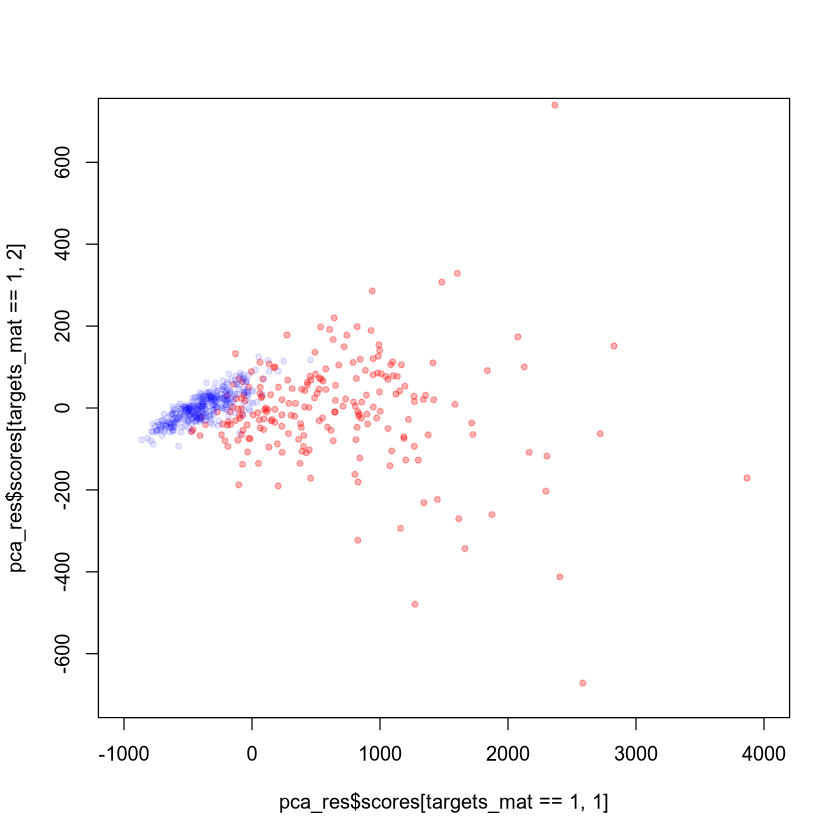

In [248]:
plot(x=pca_res$scores[targets_mat==1,1], y=pca_res$scores[targets_mat==1,2], pch=20, col=rgb(1,0,0,0.3), xlim=c(-1000,4000), ylim=c(-700,700))
points(x=pca_res$scores[targets_mat==0,1], y=pca_res$scores[targets_mat==0,2], pch=20, col=rgb(0,0,1,0.1))


In [297]:
# Plotting densities
xg <- seq(-1000, 1500, by=10)
yg <- seq(-200, 200, by=10)

gridmat <- data.matrix(expand.grid(xg, yg))

In [298]:
size(gridmat)[1]

[1] 10291

In [299]:
num_pcs <- 30
gridmat_padded <- matrix(0, nrow=size(gridmat)[1], ncol=30)
gridmat_padded[ , 1:2] <- gridmat
gridmat_padded[ , ]

-1000,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-990,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-980,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-970,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-960,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-950,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-940,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-930,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-920,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-910,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-900,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [320]:

# z_vals_lcic <- matrix(evaluate_mixture_density_vectorized(em_output_HD$cluster_densities, em_output_HD$pi_vec, gridmat_padded), nrow=length(xg))
z_vals_lcic <- matrix(evaluate_mixture_density_vectorized(em_output_HD$cluster_densities, em_output_HD$pi_vec, 
                                                    map_to_data_space(gridmat_padded, pca_res)), nrow=length(xg))



In [321]:
z_vals_d1 <- evaluate_logcondens_estimator_vectorized(map_to_data_space(gridmat_padded, pca_res), em_output_HD$cluster_densities[[1]])
z_vals_d1 <- matrix(z_vals_d1, nrow=length(xg))

z_vals_d2 <- evaluate_logcondens_estimator_vectorized(map_to_data_space(gridmat_padded, pca_res), em_output_HD$cluster_densities[[2]])
z_vals_d2 <- matrix(z_vals_d2, nrow=length(xg))

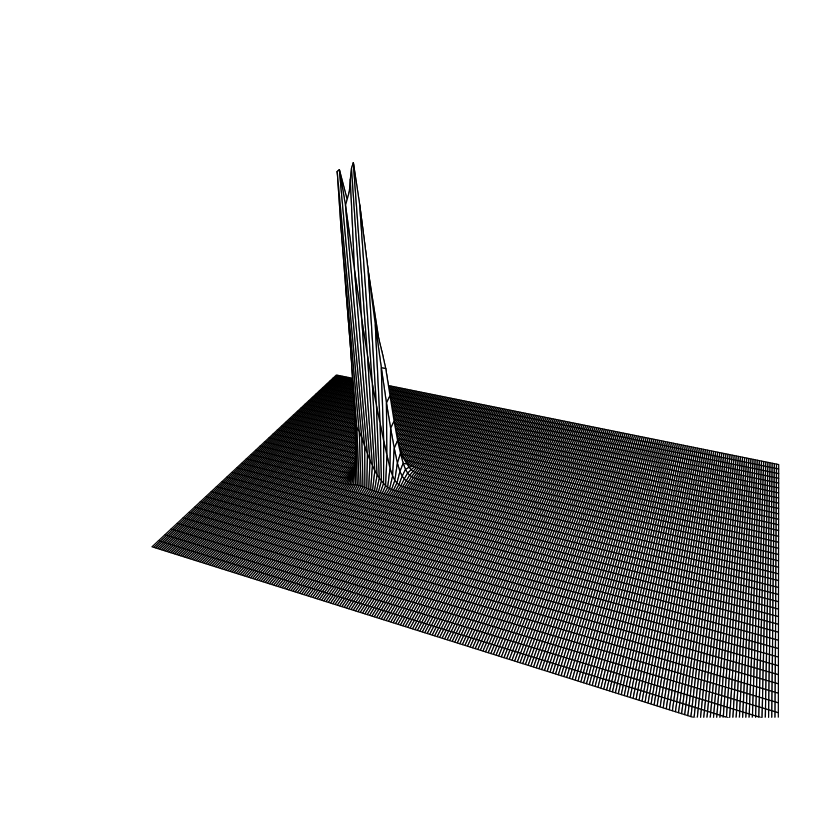

In [324]:
theta <- 20
phi <- 30
persp(xg, yg, z_vals_lcic, theta=theta, phi=phi, box=FALSE, xlim=c(-500,1000), ylim=c(-200,200))



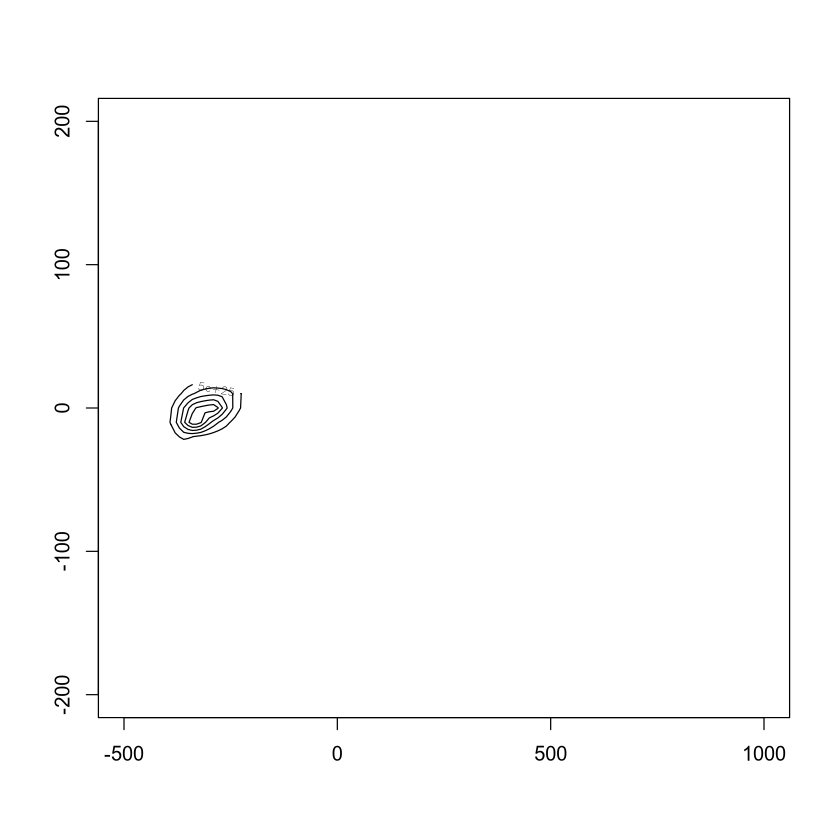

In [325]:
contour(xg, yg, z_vals_lcic, xlim=c(-500,1000), ylim=c(-200,200))



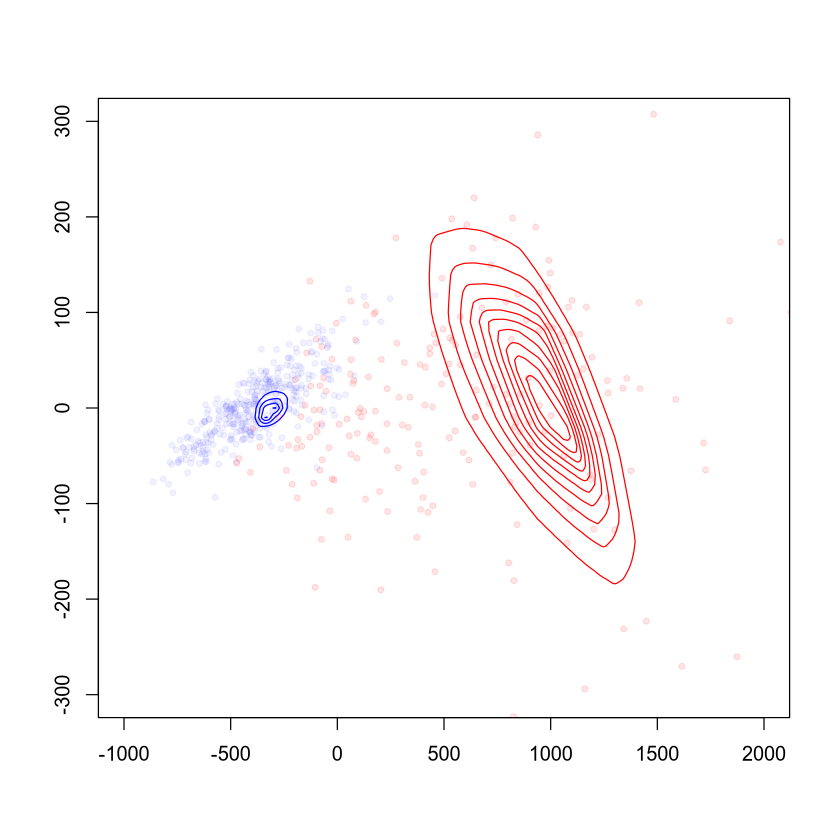

In [332]:
contour(xg, yg, z_vals_d1, xlim=c(-1000,2000), ylim=c(-300,300), drawlabels=FALSE, nlevels=10, col=rgb(1,0,0,1))
contour(xg, yg, z_vals_d2, add=TRUE, nlevels=5, col=rgb(0,0,1,1))

points(x=pca_res$scores[targets_mat==1,1], y=pca_res$scores[targets_mat==1,2], pch=20, col=rgb(1,0,0,0.1))
points(x=pca_res$scores[targets_mat==0,1], y=pca_res$scores[targets_mat==0,2], pch=20, col=rgb(0,0,1,0.05))


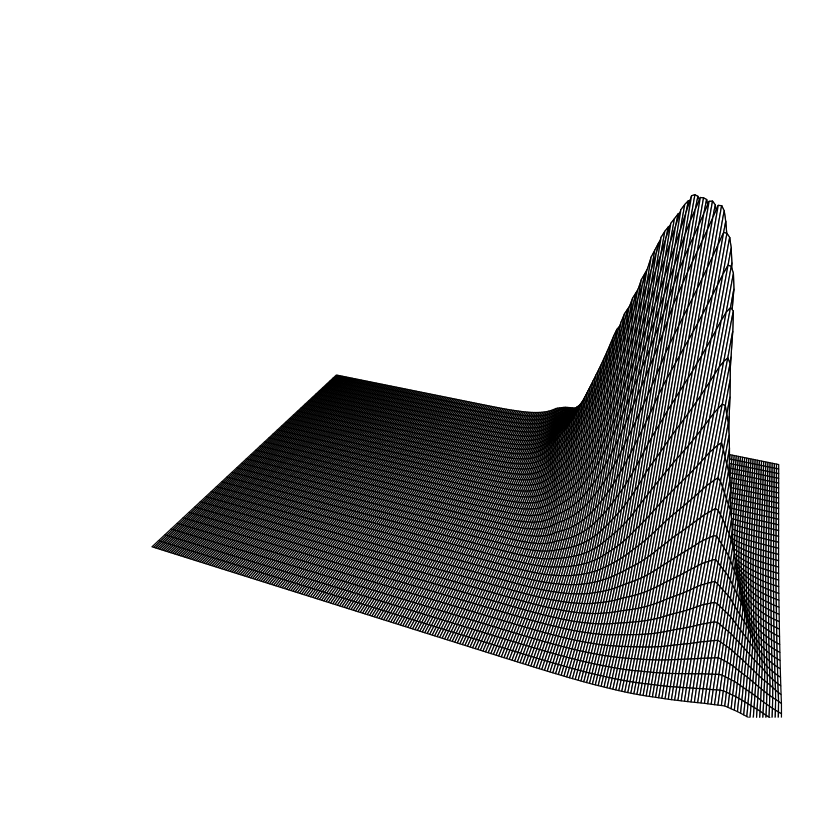

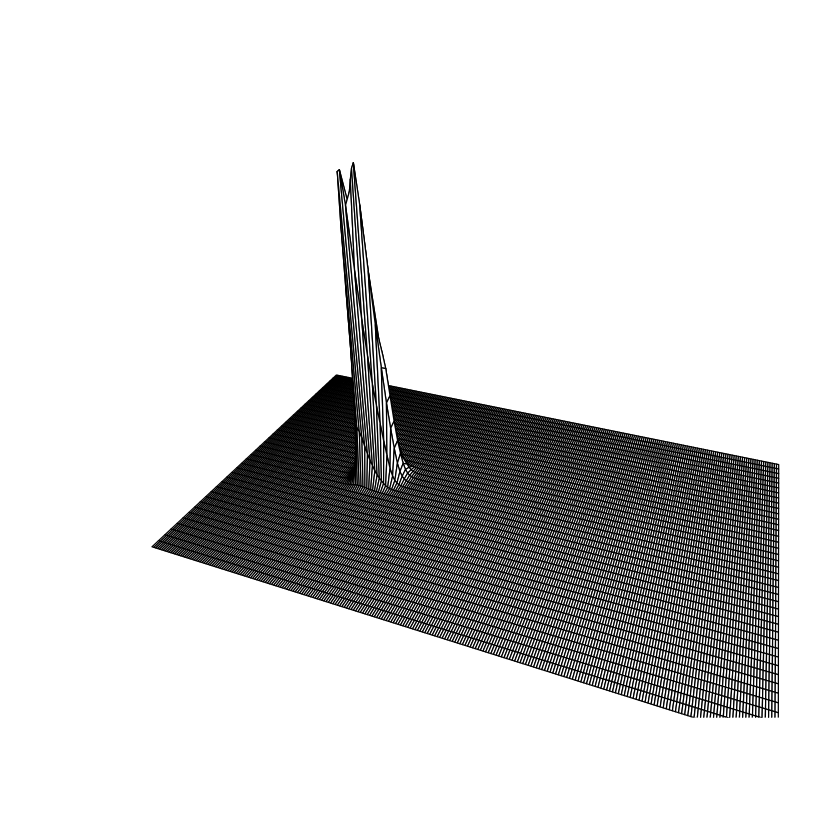

In [328]:
persp(xg, yg, z_vals_d1, theta=theta, phi=phi, box=FALSE, xlim=c(-500,1000), ylim=c(-200,200))

persp(xg, yg, z_vals_d2, theta=theta, phi=phi, box=FALSE, xlim=c(-500,1000), ylim=c(-200,200))

# points(x=pca_res$scores[targets_mat==1,1], y=pca_res$scores[targets_mat==1,2], pch=20, col=rgb(1,0,0,0.1))
# points(x=pca_res$scores[targets_mat==0,1], y=pca_res$scores[targets_mat==0,2], pch=20, col=rgb(0,0,1,0.1))
